In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataset007.csv')

                 Hour  Lane 1 Occ (%)  Lane 1 Speed (mph)  Lane 2 Occ (%)  \
0 2023-09-01 00:00:00             0.8                71.9             1.9   
1 2023-09-01 01:00:00             0.7                71.9             1.4   
2 2023-09-01 02:00:00             0.5                71.9             1.1   
3 2023-09-01 03:00:00             1.0                72.0             1.6   
4 2023-09-01 04:00:00             1.9                70.9             2.6   

   Lane 2 Speed (mph)  Lane 3 Occ (%)  Lane 3 Speed (mph)  Occupancy (%)  \
0                69.2             1.6                62.4            1.5   
1                68.8             1.3                62.7            1.1   
2                69.5             1.1                62.5            0.9   
3                69.2             1.4                62.9            1.4   
4                72.0             3.2                60.1            2.6   

   Speed (mph)  # Lane Points  % Observed  
0         67.4             36       

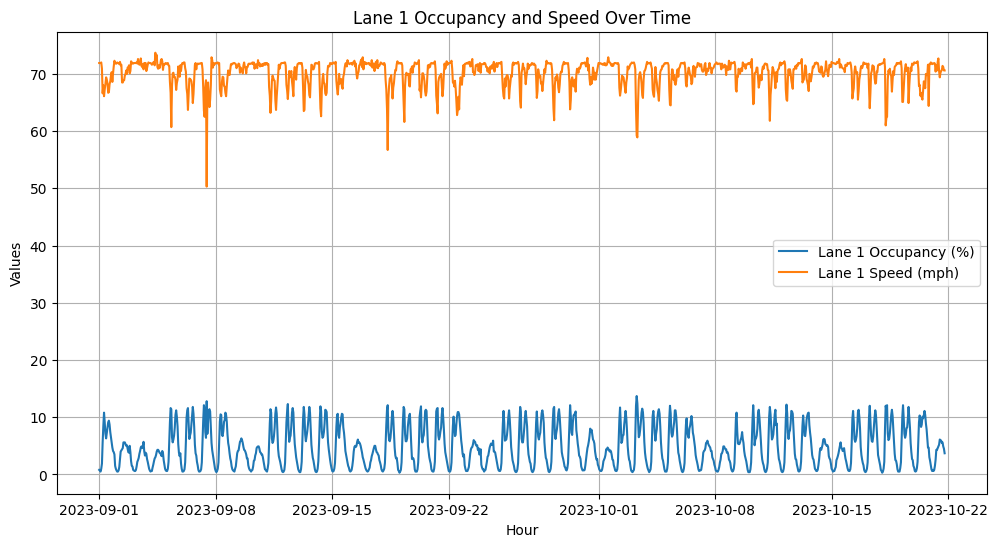

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/dataset007.csv')

# Convert the 'Hour' column to a datetime object and sort the data
data['Hour'] = pd.to_datetime(data['Hour'], format='%m-%d-%Y %H:%M')
data = data.sort_values(by='Hour')

# Check the first few rows of the dataset
print(data.head())

# Check the basic statistics of the dataset
print(data.describe())

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Hour'], data['Lane 1 Occ (%)'], label='Lane 1 Occupancy (%)')
plt.plot(data['Hour'], data['Lane 1 Speed (mph)'], label='Lane 1 Speed (mph)')
plt.xlabel('Hour')
plt.ylabel('Values')
plt.title('Lane 1 Occupancy and Speed Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Feature selection: Choose relevant columns for modeling
features = ["Lane 1 Occ (%)", "Lane 1 Speed (mph)", "Lane 2 Occ (%)", "Lane 2 Speed (mph)"]
target = ["Speed (mph)"]

# Split the data into features and target
X = data[features].values
y = data[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create an LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train.shape[1], 1), activation='relu'))
model_lstm.add(Dense(1, activation='linear'))

model_lstm.compile(loss='mean_squared_error', optimizer='adam')


In [17]:
# Train the LSTM model for short-term forecasting
model_lstm.fit(X_train, y_train, epochs=77, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/77
31/31 [==============================] - 0s 11ms/step - loss: 1.7226 - val_loss: 2.3996
Epoch 2/77
31/31 [==============================] - 0s 12ms/step - loss: 1.7019 - val_loss: 2.5313
Epoch 3/77
31/31 [==============================] - 0s 10ms/step - loss: 1.7609 - val_loss: 2.5518
Epoch 4/77
31/31 [==============================] - 0s 10ms/step - loss: 1.8065 - val_loss: 2.3633
Epoch 5/77
31/31 [==============================] - 0s 10ms/step - loss: 1.7333 - val_loss: 2.2888
Epoch 6/77
31/31 [==============================] - 0s 11ms/step - loss: 1.6823 - val_loss: 2.2723
Epoch 7/77
31/31 [==============================] - 0s 12ms/step - loss: 1.6376 - val_loss: 2.3772
Epoch 8/77
31/31 [==============================] - 0s 10ms/step - loss: 1.5922 - val_loss: 2.2712
Epoch 9/77
31/31 [==============================] - 0s 11ms/step - loss: 1.6185 - val_loss: 2.2871
Epoch 10/77
31/31 [==============================] - 0s 10ms/step - loss: 1.6262 - val_loss: 2.3540
Epoch 11/

In [18]:
from sklearn.metrics import r2_score

# Predictions from LSTM
y_pred_lstm = model_lstm.predict(X_test)

# Calculate R-squared
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"R-squared for LSTM Model: {r2_lstm}")

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"RMSE for LSTM Model: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lstm)
print(f"MAE for LSTM Model: {mae}")

# Calculate MASE
# MASE = MAE / MAE_naive, where MAE_naive is the MAE of a simple naive model (e.g., using the previous value as a forecast)
naive_forecast = np.roll(y_test, 1)
mae_naive = mean_absolute_error(y_test[1:], naive_forecast[1:])
mase = mae / mae_naive
print(f"MASE for LSTM Model: {mase}")

# Calculate MAPE
# MAPE = (1/n) * Σ |(actual - forecast) / actual| * 100, where n is the number of samples
mape = (np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100)
print(f"MAPE for LSTM Model: {mape}")

8/8 [==============================] - 0s 2ms/step
R-squared for LSTM Model: 0.9750665176895587
RMSE for LSTM Model: 0.4125346038446392
MAE for LSTM Model: 0.3034831281568185
MASE for LSTM Model: 0.11319478149210574
MAPE for LSTM Model: 0.4714733356061787


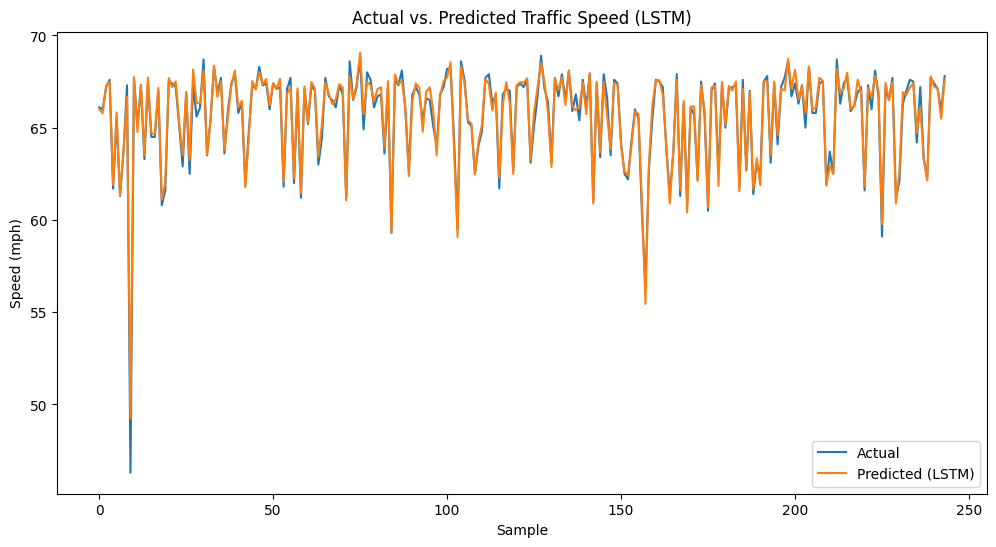

In [19]:
import matplotlib.pyplot as plt

# Visualize the predictions for LSTM model
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='Predicted (LSTM)')
plt.legend()
plt.title('Actual vs. Predicted Traffic Speed (LSTM)')
plt.xlabel('Sample')
plt.ylabel('Speed (mph)')
plt.show()
